In [ ]:
#Reproduce_fashion_mnist

!git clone https://github.com/ishida-lab/irreducible.git
%cd irreducible

# setup 0, clean confidences (no noise)
!python be_synthetic.py --setup 0

# setup 0, with confidence noise
!python be_synthetic.py --setup 0 --noise --standard_deviation 0.4


Cloning into 'irreducible'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 61 (delta 21), reused 21 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 6.39 MiB | 18.13 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/irreducible
setup: 0 | noise: False | data size: 2 | seed: 0 1 2 3 4 5 6 7 8 9 
PN in Eq.4 mean (ste): 0.139 (0.0175) Pconf in Eq.8 mean (ste): 0.132 (0.0545)
setup: 0 | noise: False | data size: 4 | seed: 0 1 2 3 4 5 6 7 8 9 
PN in Eq.4 mean (ste): 0.0861 (0.017) Pconf in Eq.8 mean (ste): 0.11 (0.0401)
setup: 0 | noise: False | data size: 8 | seed: 0 1 2 3 4 5 6 7 8 9 
PN in Eq.4 mean (ste): 0.0958 (0.0109) Pconf in Eq.8 mean (ste): 0.11 (0.0207)
setup: 0 | noise: False | data size: 16 | seed: 0 1 2 3 4 5 6 7 8 9 
PN in Eq.4 mean (ste): 0.102 (0.0105) Pconf in Eq.8 mean (ste): 0.112 (0.0128)
setup: 0 | noise: False | data size: 32 | seed: 0 1 

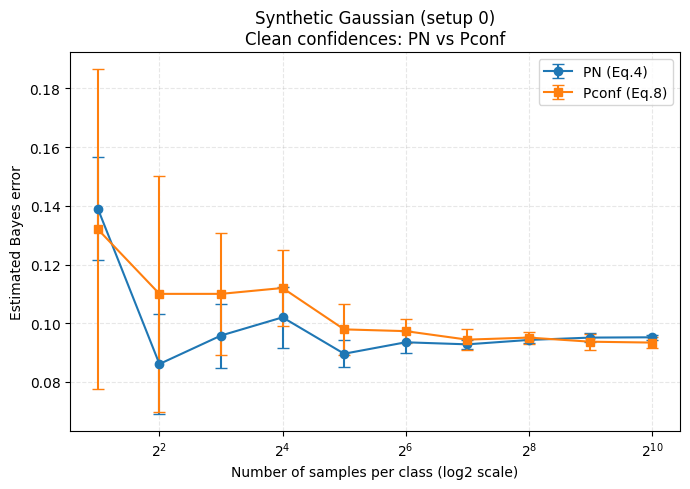

In [ ]:


import numpy as np
import matplotlib.pyplot as plt


data_sizes = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1028], dtype=float)

PN_mean  = np.array([0.139, 0.0861, 0.0958, 0.102, 0.0896, 0.0935, 0.0928, 0.0943, 0.0951, 0.0952])
PN_se    = np.array([0.0175, 0.0170, 0.0109, 0.0105, 0.00463, 0.00378, 0.00154, 0.00109, 0.00151, 0.000911])

Pconf_mean = np.array([0.132, 0.11, 0.11, 0.112, 0.0979, 0.0973, 0.0944, 0.0951, 0.0937, 0.0934])
Pconf_se   = np.array([0.0545, 0.0401, 0.0207, 0.0128, 0.00863, 0.00416, 0.00367, 0.00203, 0.00276, 0.0018])

plt.figure(figsize=(7,5))

plt.errorbar(data_sizes, PN_mean,    yerr=PN_se,    fmt='-o', capsize=4, label='PN (Eq.4)')
plt.errorbar(data_sizes, Pconf_mean, yerr=Pconf_se, fmt='-s', capsize=4, label='Pconf (Eq.8)')

plt.xscale('log', base=2)
plt.xlabel("Number of samples per class (log2 scale)")
plt.ylabel("Estimated Bayes error")
plt.title("Synthetic Gaussian (setup 0)\nClean confidences: PN vs Pconf")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


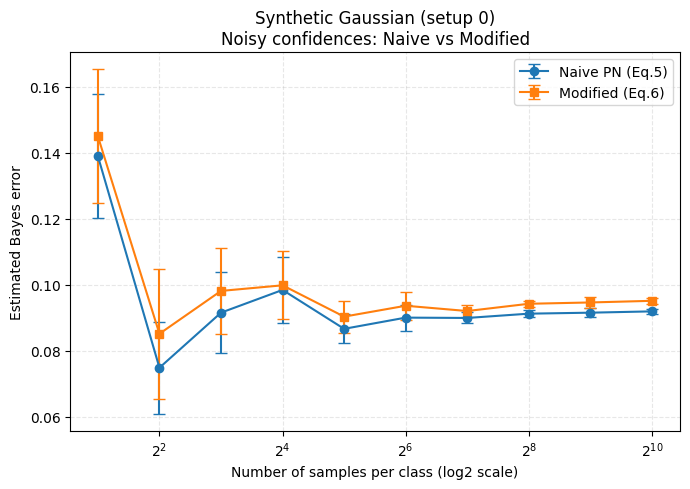

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_sizes = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1028], dtype=float)

naive_mean = np.array([0.139, 0.0748, 0.0915, 0.0984, 0.0866, 0.09, 0.0899, 0.0912, 0.0915, 0.0919])
naive_se   = np.array([0.0189, 0.014, 0.0122, 0.00988, 0.00435, 0.00391, 0.00167, 0.00104, 0.00145, 0.000723])

mod_mean   = np.array([0.145, 0.0851, 0.0981, 0.0998, 0.0903, 0.0936, 0.092, 0.0942, 0.0946, 0.0951])
mod_se     = np.array([0.0203, 0.0197, 0.0131, 0.0103, 0.00483, 0.00422, 0.00176, 0.000867, 0.00159, 0.000838])

plt.figure(figsize=(7,5))

plt.errorbar(data_sizes, naive_mean, yerr=naive_se, fmt='-o', capsize=4, label='Naive PN (Eq.5)')
plt.errorbar(data_sizes, mod_mean,   yerr=mod_se,   fmt='-s', capsize=4, label='Modified (Eq.6)')

plt.xscale('log', base=2)
plt.xlabel("Number of samples per class (log2 scale)")
plt.ylabel("Estimated Bayes error")
plt.title("Synthetic Gaussian (setup 0)\nNoisy confidences: Naive vs Modified")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
